<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/AM21_re_exam_losning_prelim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eksamen: Anvendt Matematik

Opgaven har 2 dele. Lineær algebra og calculus.

#### Rules of the game:

- Don't panic! - Hvis koden ikke virker (men virkede før). Gå tilbage, og kør oppefra ned. Også en god ide at tjekke, at koden er fejlfri ved at gøre denne øvelse undervejs.
- De fleste kodefejl er dumme stavefejl. Vær omhyggelig med kommaer, punkter etc.
- Hvis der er noget, som slet ikke kan løses, så kan du bare kommentere ud med `#`
- Husk, at output skal kunne ses (f.eks. dine plots)
- Play fair og lad være med at snyde!  
- Brug objektnavne, der blev defineret i opgaven
- Der afleveres som 👉 `ipynb` (**ikke PDF!**) - dvs, du skal bare downloade den fil du arbejder med fra colab eller bare aflevere den ipynb fil som du har åbent i Jupyter Lab.

In [ ]:
# importer pakker
from sympy import *
import numpy as np
np.set_printoptions(suppress=True)
from scipy import linalg
import matplotlib.pyplot as plt

## Del 1: Lineær Algebra - Vejgaards Ruller

![](https://source.unsplash.com/n1DePkKznLY)

Manageren for sushistedet "Vejgaards Ruller" vil gerne finde ud af hvordan man kan tjene mere ved at optimere produktion af 2 forskellige sushi-typer - Vandmanden og Mågen.

| Ingredienser/Type               | Vandmanden | Mågen | På lager | enhed |
|---------------------------------|------------|-------|----------|-------|
| Ris                             |        120 |   200 |    10000 | gram  |
| Nori*                           |          1 |     2 |      120 | stk   |
| Rejer                           |          4 |     8 |      500 | stk   |
| Avokado                         |        0.5 |     1 |      100 | stk   |
| Chef                            |       0.17 |  0.09 |        8 | timer |
| Pris per stor rulle / anretning |         85 |   110 |          | dkk   |

*Nori sushi tang er den traditionelle japanske tang, der bruges til at rulle sushi-rullerne.



In [ ]:
# 1.1 - Grafisk løsning
# Plot de 5 funktioner med Vandmanden på x-aksen og Mågen på y-aksen

# Brug np.linspace til at generere 200 værdier mellem 0 og 250 som v_plot

v_plot = np.linspace(0, 250, num=200)

In [ ]:
# omskriv ligninger til at beregne c-værdier(m_plot_1 - m_plot_5)
m_plot_1=(10000-120*v_plot)/200
m_plot_2=(120-1*v_plot)/2
m_plot_3=(500-4*v_plot)/8
m_plot_4=(100-0.5*v_plot)/1
m_plot_5=(8-0.17*v_plot)/0.09

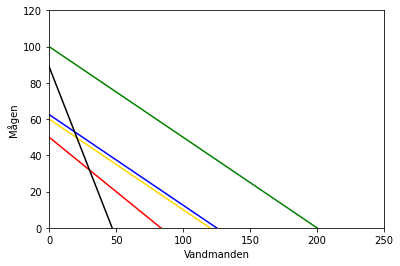

In [ ]:
# 1.2

# Plot

plt.axis([0, 250, 0, 120])
plt.xlabel('Vandmanden')
plt.ylabel('Mågen')

plt.plot(v_plot, m_plot_1, color = "red") # ris
plt.plot(v_plot, m_plot_2, color = "gold") # nori
plt.plot(v_plot, m_plot_3, color = "blue") # rejer
plt.plot(v_plot, m_plot_4, color = "green") # avokado
plt.plot(v_plot, m_plot_5, color = "black") # chef

Vi antager følgende:
- de to typer af sushi er det eneste, som Vejgaards Ruller producerer
- madvarer kan ikke holde længere end vores produktionscyklus
- Vi kan ikke udvide mængder af vores inputs


In [ ]:
# 1.3.1 Hvor mange ruller af de to typer kan der produceres? (aflæs cirka værdi fra grafisk løsning)

q_vandmanden = 30
q_mågen = 30

In [ ]:
# 1.3.2 Hvad har vi købt for meget af? (skriv tekst)

svar_1_4 = 'Avokado, Nori, Rejer'

#### Løsning af matrixligningen

Vi kan finde en præcis løsning af vores ligningssystem for ris og arbejde(chef) ligninger ved at løse matrixligningen $A\vec{x} = \vec{b}$
Opgaven er mere frit og du skal vise, at du selv kan udføre alle trin.
Du skal finde løsningen "manuelt" dvs. ikke ved at bruge `scipy.linalg.solve` eller sympy. Du må dog gerne bruge det for at tjekke, om dine beregninger passer...


Du skal bruge følgende python objekter:


*   $A$: `matrix_a`
*   $A^{-1}$: `matrix_a_inv`
*   $\vec{b}$: `vector_b`
* $\vec{x}$: `vector_x`



In [ ]:
# 1.4.1
# definer matrix A
matrix_a = np.array([
[0.17, 0.09],
[120, 200]
])

# definer vector b
vector_b = np.array([[8],[10000]])

In [ ]:
# 1.4.2
# beregn A^-1
matrix_a_inv = linalg.inv(matrix_a)

In [ ]:
# 1.4.3 beregn vector_x
vector_x = matrix_a_inv @ vector_b

In [ ]:
vector_x

array([[30.17241379],
       [31.89655172]])

#### Hvordan øger man output?

Du vil rigtig gerne øge dit output til 40 ruller vandmanden / 45 ruller mågen 
dvs. $\vec{x_{ny}} = \begin{bmatrix}
    40 \\
    45 \\
\end{bmatrix} $
Vi ved, at $A\vec{x} = \vec{b}$. Overvej, hvordan du kan finde den tilsvarende vektor $\vec{b_{ny}}$, som viser hvor mange timer arbejde og gram ris der skal til så man kan producere den ønskede mængde.

In [ ]:
# 1.5 beregn vector_b_ny
vector_x_ny = np.array([[40],[45]])
vector_b_ny = matrix_a @ vector_x_ny
print(vector_b_ny)

[[   10.85]
 [13800.  ]]


#### Rækkeoperationer

Der kunne findes en souschef, som vil komme ind på deltid og arbejde 3 timer - dvs. vi har nu 11 timer arbejde til rådighed. Vi kan også antage, at der kunne købes en del mere ris, således det ikke længere er en begrænsning.

I denne opgave skal du bruge rækkeoperationer til at finde løsningen.

1.   Du skal først definere en augmenteret matrix som `np.array` der repræsenterer ligninger for arbejde/chef og nori. 
2.   Derefter skal du bruge rækkeoperationer (kode!!!) for at omskrive til reduceret trappeform (reduceret række-echelon form).

f.eks.: `augmented[0] = augmented[0]/augmented[0,0]`

Til sidst har din matrix denne form: 

$$\left[\begin{array}{rr|r}
1 & 0 & ? \\ 
0 & 1 & ?
\end{array}\right]$$

3. Her vil du kunne aflæse resultatet i søjlevektoren på højre sidde.



In [ ]:
## 1.6.1 definer augmenteret matrix

augmented = np.array([
[0.17, 0.09, 11],
[1, 2, 120]

])

In [ ]:
# 1.6.2

# Brug rækkeoperationer (så mange som du har brug for) for at omskrive til reduceret trappeform
# Her er den første operation, som du kan bruge
augmented[0] = augmented[0]/augmented[0,0]

In [ ]:
# OBS: Det er en god ide at tjekke din matrix undervejs - du kan tilføje en celle, vise matrix 
# (bare skriv "augmented" og udfør og slette igen...)

augmented

array([[  1.        ,   0.52941176,  64.70588235],
       [  1.        ,   2.        , 120.        ]])

In [ ]:
augmented[1] = augmented[1] - augmented[1,0]*augmented[0]

In [ ]:
augmented

array([[ 1.        ,  0.52941176, 64.70588235],
       [ 0.        ,  1.47058824, 55.29411765]])

In [ ]:
augmented[1] = augmented[1] / augmented[1,1]

In [ ]:
augmented

array([[ 1.        ,  0.52941176, 64.70588235],
       [ 0.        ,  1.        , 37.6       ]])

In [ ]:
augmented[0] = augmented[0] - augmented[0,1]*augmented[1]

In [ ]:
# print resultatet der viser hvor mange ruller der nu kan laves
print(augmented)

[[ 1.   0.  44.8]
 [ 0.   1.  37.6]]


#### Investering i flere inputs

Manageren prøver at finde ud af om det kan betale sig, at investere i flere arbejdstimer og indkøb af mere ris (vi glemmer lige andre inputs her for nu).

Du har tidligere lavet en beregning, der viser hvor meget ris og arbejde der skal til således der kan produceres 40 ruller vandmanden / 45 ruller mågen (hvis den ikke lykkedes, må du bruge 10.85 timer til din beregning her).
Du kan også bruge 32 og 33 som værdier til de originale optimale mængder.

Du kan antage følgende omkostninger for indkøb af yderlige input:
- Ris: 60kr
- Nori: 80kr
- Rejer: 200kr

Lav følgende beregninger for at samligne ændringen i omsætning med ændring af omkostninger

*   Omsætning med oprindelige input og output mængder
*   Omsætning med øgede mængder output
*   Tilvækst af omsætning
*   Omkostninger ekstra arbejde og yderlige indkøb

Kan det betale sig?


In [ ]:
# 1.7 
# omsætning original

oms = 85*30 + 110*31

In [ ]:
# omsætning ny

oms_n = 85*40 + 110*45

In [ ]:
# tilvækst omsætning

delta_oms = oms_n-oms

In [ ]:
# tilvækst omkostninger

delta_c = (10.85-8)*300+60+80+200

In [ ]:
# ændring profit
# Er det en god ide at udvide?

delta_p = delta_oms - delta_c
print(delta_p)

1195.0


## Calculus - Logistik og profitmaksimering

![](https://source.unsplash.com/jOqJbvo1P9g)

En af Danmarks mindre containerhavne overvejer, om de skal justere deres daglige kapaciteter. 
$q$ er mængden af containere, $p$ en angivet i kr. pr. container, der kommer igennem havnen.

* Deres omkostningsfunktion er:
$C(q) = 6000-25q+0.03q^{2}+0.00009q^{3}$
* Efterspørgslen er givet som:
$p(q) = 320+0.025q-0.00085q^{2}$ dvs. prisen er ikke konstant men ændrer sig (lidt) med ændringer af $q$


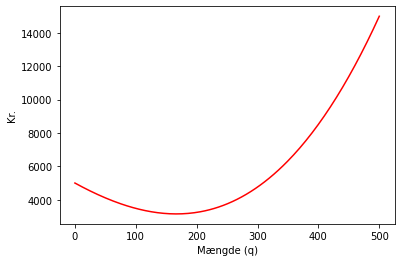

In [ ]:
# 2.1 plot C(q)
# definer 200 punkter mellem 0 og 500 med np.linspace i objektet q_plot

q_plot = np.linspace(0, 500, num=200)

# beregn tilsvarende p-værdier og plot

p_plot_1 = 6000-25*q_plot+0.03*q_plot**2+0.00009*q_plot**3

plt.xlabel('Mængde (q)')
plt.ylabel('Kr.')

plt.plot(q_plot, p_plot_1, color = "red")

In [ ]:
# 2.2 Definer symboler p, q og h

p, q, h = symbols('p, q, h')

In [ ]:
# opstil sympy ligninger for omkostninger og efterspørgsel

C_q = 6000-25*q+0.03*q**2+0.00009*q**3
p_q = 320+0.025*q-0.00085*q**2

In [ ]:
# vis C_q
C_q

9.0e-5*q**3 + 0.03*q**2 - 25*q + 6000

In [ ]:
#vis p_q
p_q

-0.00085*q**2 + 0.025*q + 320

#### 2.3 Beregn minimum for $C(q)$

* beregning skal foretages "manuelt" hvor du først skal finde $C'(q)$ ved at beregne $\lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$, hvor $C(q)$ indsættes for $f(x)$ dvs. $\lim_{h \to 0} \frac{C(q + h) - C(q)}{h}$
*$h$ blev allerede oprettet som Sympy sybol

In [ ]:
# 2.3.1
# definer C(q+h)

C_q_h = C_q.subs(q, (q+h))

In [ ]:
# 2.3.2
# beregn grænseværdien / marginalomkostninger MC

MC = limit((C_q_h - C_q)/h, h, 0)
MC

0.00027*q**2 + 0.06*q - 25.0

In [ ]:
# du kan tjekke, om grænseværdien er lige med den (automatisk) afledede funktion (sympy diff) for at være sikker...
# hvis du ikke kan løse 2.3.2, så må du gerne definere MC som diff(C_q) og bruge det herfra
diff(C_q)

0.00027*q**2 + 0.06*q - 25

In [ ]:
# 2.3.3
# hvor mange containere skal der max igennem havnen per dag, hvis man vil minimere omkostninger?
# brug Sympy solve til a finde q, hvor C minimeres
solutions = solve(C_lim)
print(solutions)

[-435.052883046961, 212.830660824739]


#### 2.4 - Find tangentlinjen 

- Beregn den lineære ligning $t = mx+b$ der beskriver tangenten i $q_{t} = 100$
- Du skal først finde $p_{t}$
- Brug **MC** beregnet i 2.3 eller (hvis du ikke kunne finde svaret) ved at bruge sympy `diff` og beregn hældning $m$ i $q_{t}$
- plot $C(q)$ og $t(q)$ i $q_{t} = 100$


In [ ]:
# 2.4.1
# beregning y_t
p_t = C_q.subs(q, 100)
print(p_t)

3890.00000000000


In [ ]:
# 2.4.2
# beregning m
m = MC.subs(q, 100)
print(m)

-16.3000000000000


In [ ]:
# 2.4.3
# beregn b

b = 3890 + 16.3*100
print(b)

5520.0


In [ ]:
# 2.4.4
# brug tangentlining t = mx + b for at beregne t_plot hvor du bruger q_plot (fra 2.1 som "x"-værdier) og de lige beregnede m og b
t_plot = m*q_plot+b

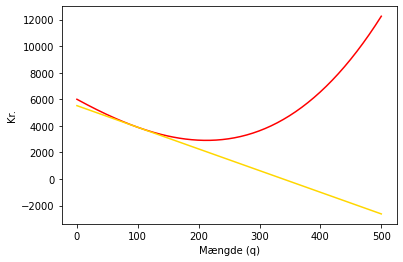

In [ ]:
# 2.4.5 plot C(q) og t(q)

plt.xlabel('Mængde (q)')
plt.ylabel('Kr.')

plt.plot(q_plot, p_plot_1, color = "red")
plt.plot(q_plot, t_plot, color = "gold")


* Indtægter: $R(q) = p(q) · q$
* Marginalomkostninger $MC = C'(q)$ (omkostninger ved at producere +1 enhed)
* Marginalindtægter $MR = R'(q)$ (indtægter ved at sælge +1 enhed)

In [ ]:
# 2.5.1 Definer R_q og MR (MC blev defineret tidligere)
R_q = p_q * q
MR = diff(R_q)

In [ ]:
# 2.5.2 Opstil som ligninger MC(q) = p og MR(q) = p
MC_eq = Eq(MC,p)
MR_eq = Eq(MR,p)

In [ ]:
# Beregn monopolmænge og marginalpris hvor MC = MR med sympy solve
solve([MC_eq,MR_eq])

[{p: -12.7244654983821, q: -351.549505738364},
 {p: 28.5789245296180, q: 348.003406447584}]